## Import thư viện 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import spatialmath.base.symbolic as sym
from roboticstoolbox import DHRobot, RevoluteDH, ERobot, ELink, ETS
from math import pi, sin, cos
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from DMP.dmp_discrete import DMPs_discrete
from spatialmath import *
from spatialmath.base import *
from math import sqrt
from spatialmath import SE3
%matplotlib notebook

## Khởi tạo robot từ bảng DH

In [2]:
# canh tay do (DH mới)
L1 = RevoluteDH(a=0, d=125.5, alpha=pi/2)
L2 = RevoluteDH(a=0, d=0, alpha=-pi/2)
L3 = RevoluteDH(a=0, d=340, alpha=-pi/2)
L4 = RevoluteDH(a=0, d=0, alpha=pi/2)
L5 = RevoluteDH(a=0, d=270, alpha=pi/2)

robot = DHRobot([L1, L2, L3, L4, L5],name='Huy',gravity=[0,0,9.81])


## Hàm gen dmp

In [3]:
# def M2ER(M):
#     return np.concatenate((M.t, M.rpy()*100))
def ER2M(E,R):
    return SE3(transl(E) @ rpy2tr(R))

In [4]:
folder = 'data/dong_tac/uong_nuoc/'
paths = os.listdir(folder)

In [6]:
# plt.figure(figsize = (5,3),dpi = 100)
# x = range(len(ER_do))
# for i in range(len(ER_do)):
#     plt.plot(x,ER_do[:,i])
# plt.imshow()

In [7]:
def dmp_gen(q_ik, q_qd, robot, random_e, n):
    """"
    q_ik: 
    q_qd: quỹ đạo mẫu
    robot
    ramdom_e: giá trị random góc khớp (rad)
    n: số lượng quỹ đạo mỗi điểm
    """
    
    i = 3
    q_do = np.loadtxt(folder + paths[i], dtype = np.float64)*pi/180
    q_do[:,1] = pi/2- q_do[:,1]
    M_do = robot.fkine(q_do)
    E_do = np.array(M_do.t)

    E_dmps=[]
    q_dmps = []
    E_q_dmps = []

    dmp_E=DMPs_discrete(n_dmps=3,n_bfs=100, dt=1/50)
    dmp_q=DMPs_discrete(n_dmps=5,n_bfs=100, dt=1/50)
    dmp_E.imitate_path(y_des=E_do.T)
    dmp_q.imitate_path(y_des=q_do.T)

    for q in tqdm(q_ik):
        for i in tqdm(range(n)):
            
            qr0 = np.random.rand(5)*random_e/5
            qg0 = np.random.rand(5)*random_e

#             dmp_E.y0 = robot.fkine(q_do[0,:]+qr0).t
#             dmp_q.y0 = q_do[0,:]+qr0
            dmp_E.y0 = robot.fkine(q_do[0,:]).t
            dmp_q.y0 = q_do[0,:]

            dmp_E.goal = robot.fkine(q+ qg0).t
            dmp_q.goal = q + qg0

            E_track, _, _ = dmp_E.rollout()
            q_track, _, _ = dmp_q.rollout()

            E_dmp = np.array(E_track)
            q_dmp = np.array(q_track)
            E_q_dmp = np.array(robot.fkine(q_dmp).t)

            q_dmps.append(q_dmp)
            E_dmps.append(E_dmp)
            E_q_dmps.append(E_q_dmp)
    return  np.array(q_dmps), np.array(E_dmps), np.array(E_q_dmps)


In [8]:
# def dmp_gen(q_ik, q_qd, robot, random_e, n):
#     """"
#     q_ik: 
#     q_qd: quỹ đạo mẫu
#     robot
#     ramdom_e: giá trị random góc khớp (rad)
#     n: số lượng quỹ đạo mỗi điểm
#     """
    
#     i = 3
#     q_do = np.loadtxt(folder + paths[i], dtype = np.float64)*pi/180
#     q_do[:,1] = pi/2- q_do[:,1]
#     M_do = robot.fkine(q_do)
#     R_do = np.array(M_do.rpy())
#     E_do = np.array(M_do.t)

#     E_dmps=[]
#     q_ik_dmps = []
#     q_dmps = []
#     E_q_dmps = []

#     dmp_E=DMPs_discrete(n_dmps=3,n_bfs=100, dt=1/50)
#     dmp_R=DMPs_discrete(n_dmps=3,n_bfs=100, dt=1/50)
    
    
    
#     dmp_E.imitate_path(y_des=E_do.T)
#     dmp_R.imitate_path(y_des=R_do.T)
    

#     for q in tqdm(q_ik):
#         dmp_E.y0 = robot.fkine(q_do[0,:]).t
#         dmp_R.y0 = robot.fkine(q_do[0,:]).rpy()

#         dmp_E.goal = robot.fkine(q).t
#         dmp_R.goal = robot.fkine(q).rpy()

#         E_track, _, _ = dmp_E.rollout()
#         R_track, _, _ = dmp_R.rollout()
        
#         M_dmp = (list(map(ER2M, E_track, R_track)))
# #         q_ik_E_dmp = np.array(list(map(lambda x: robot.ikine_min(x, q0 = q_do[0,:] ).q, M_dmp)))
#         q_ik_E_dmp = []
#         q_ik_E0 = q_do[0,:]
#         for M in M_dmp:
#             q_ik_E = robot.ikine_min(M, q0 = q_ik_E0 ).q
#             q_ik_E0 = q_ik_E
#             q_ik_E_dmp.append(q_ik_E)
#         q_ik_E_dmp = np.array(q_ik_E_dmp)
#         dmp_q=DMPs_discrete(n_dmps=5,n_bfs=100, dt=1/50)
#         dmp_q.imitate_path(y_des=q_ik_E_dmp) 
#         q = q_ik_E_dmp[-1,:]
#         for i in tqdm(range(n)):
            
# #             qr0 = np.random.rand(5)*random_e/5
#             qg0 = np.random.rand(5)*random_e

#             dmp_E.y0 = robot.fkine(q_do[0,:]).t
#             dmp_q.y0 = q_do[0,:]
            
#             dmp_E.goal = robot.fkine(q+ qg0).t
#             dmp_q.goal = q + qg0

#             E_track, _, _ = dmp_E.rollout()
#             q_track, _, _ = dmp_q.rollout()

#             E_dmp = np.array(E_track)
#             q_dmp = np.array(q_track)
#             E_q_dmp = np.array(robot.fkine(q_dmp).t)

            
#             q_dmps.append(q_dmp)
#             E_dmps.append(E_dmp)
#             E_q_dmps.append(E_q_dmp)
#     return  np.array(q_dmps), np.array(E_dmps), np.array(E_q_dmps)


In [9]:
# i = 3
# q_do = np.loadtxt(folder + paths[i], dtype = np.float64)*pi/180
# q_do[:,1] = pi/2- q_do[:,1]
# M_do = robot.fkine(q_do)
# R_do = np.array(M_do.rpy())
# E_do = np.array(M_do.t)

# E_dmps=[]
# q_dmps = []
# E_q_dmps = []

# dmp_E=DMPs_discrete(n_dmps=3,n_bfs=100, dt=1/50)
# dmp_R=DMPs_discrete(n_dmps=3,n_bfs=100, dt=1/50)



# dmp_E.imitate_path(y_des=E_do.T)
# dmp_R.imitate_path(y_des=R_do.T)


# # for q in tqdm(q_ik):
# q = q_ik_25[0]
# dmp_E.y0 = robot.fkine(q_do[0,:]).t
# dmp_R.y0 = robot.fkine(q_do[0,:]).rpy()

# dmp_E.goal = robot.fkine(q).t
# dmp_R.goal = robot.fkine(q).rpy()

# E_track, _, _ = dmp_E.rollout()
# R_track, _, _ = dmp_R.rollout()

# M_dmp = (list(map(ER2M, E_track, R_track)))
# q_ik_E_dmp = np.array(list(map(lambda x: robot.ikine_min(x, q0 = q_do[0,:] ).q, M_dmp)))
# check = np.array(list(map(lambda x: robot.ikine_min(x, q0 = q_do[0,:] ).success, M_dmp)))

# dmp_q=DMPs_discrete(n_dmps=5,n_bfs=100, dt=1/50)
# dmp_q.imitate_path(y_des=q_ik_E_dmp.T)


# qg0 = np.random.rand(5)*random_e

# dmp_E.y0 = robot.fkine(q_do[0,:]).t
# dmp_q.y0 = q_do[0,:]

# dmp_E.goal = robot.fkine(q+ qg0).t
# dmp_q.goal = q + qg0

# E_track, _, _ = dmp_E.rollout()
# q_track, _, _ = dmp_q.rollout()

# E_dmp = np.array(E_track)
# q_dmp = np.array(q_track)
# E_q_dmp = np.array(robot.fkine(q_dmp).t)

In [10]:
# random_e = 0.25

# i = 3
# q_do = np.loadtxt(folder + paths[i], dtype = np.float64)*pi/180
# q_do[:,1] = pi/2- q_do[:,1]
# M_do = robot.fkine(q_do)
# E_do = np.array(M_do.t)

# E_dmps=[]
# q_dmps = []
# E_q_dmps = []

# dmp_E=DMPs_discrete(n_dmps=3,n_bfs=100, dt=1/50)
# dmp_q=DMPs_discrete(n_dmps=5,n_bfs=100, dt=1/50)

# q =q_ik_25[10]


# qr0 = np.random.rand(5)*random_e/5
# qg0 = np.random.rand(5)*random_e

# dmp_E.y0 = robot.fkine(q_do[0,:]+qr0).t
# dmp_q.y0 = q_do[0,:]+qr0

# dmp_E.goal = robot.fkine(q+ qg0).t
# dmp_q.goal = q + qg0

# E_track, _, _ = dmp_E.rollout()
# q_track, _, _ = dmp_q.rollout()

# E_dmp = np.array(E_track)
# q_dmp = np.array(q_track)
# E_q_dmp = np.array(robot.fkine(q_dmp).t)

# q_dmps.append(q_dmp)
# E_dmps.append(E_dmp)
# E_q_dmps.append(E_q_dmp)

In [11]:
colors = ['r', 'g', 'b', 'm', 'k']
linestyles = ['-', ':', '--', '-.', (0, (3, 1, 1, 1, 1, 1))]

In [12]:
# %matplotlib inline
# plt.figure(figsize = (8,6),dpi = 100)
# def plot2D(y):
#     x =range(len(y))
#     for i in range(y.shape[-1]):
#         plt.plot(y,q_dmp[:,i])
#         plt.plot(y,q_dmp[:,i], label = f"q{i+1} error (°)",  color=colors[i],linewidth=3, linestyle=linestyles[0])
#         plt.show()

In [13]:
# plot2D(q_dmps[0])

In [14]:
# %matplotlib inline
# plt.figure(figsize = (8,6),dpi = 100)
# x =range(len(E_dmp))
# for i in range(E_dmp.shape[-1]):
#     plt.plot(x,E_dmp[:,i])
#     plt.plot(x,E_dmp[:,i], label = f"q{i+1} error (°)",  color=colors[i],linewidth=3, linestyle=linestyles[0])

    
# x =range(len(E_q_dmp))
# for i in range(E_q_dmp.shape[-1]):
#     plt.plot(x,E_q_dmp[:,i], label = f"q{i+1} error (°)",  color=colors[i],linewidth=3, linestyle=linestyles[1])


## Hàm show đồ thị điểm cuối 3D

In [15]:

# fig = plt.figure(figsize = (8,6),dpi =100)
# ax = fig.add_subplot(111, projection='3d')
# plt.rcdefaults() 
# plt.title('Reaching the cup task', weight='bold')
# ax.set_facecolor("white")
# ax.set_xlabel('X (mm)')
# ax.set_ylabel('Y (mm)')
# ax.set_zlabel('Z (mm)')


def plotE(E, color='k'):
    ax.scatter3D(E[:, 0], E[:, 1], E[:, 2], color=color)

## Lưu ảnh đồ thị

In [1]:
# plt.savefig("plot/4000_5000_enpoint.svg")

## Load quỹ đạo đo được

In [17]:
# folder = 'data/dong_tac/uong_nuoc/'
# paths = os.listdir(folder)
# E_goal = []
# for i in range(len(paths)):
#     q_do = np.loadtxt(folder + paths[i], dtype = np.float64)*pi/180
#     q_do[:,1] = pi/2- q_do[:,1] 
#     E_do = robot.fkine(q_do).t
#     E_goal.append((E_do[-1]))
#     plotE(E_do, color='g')

In [20]:
i = 3
q_do = np.loadtxt(folder + paths[i], dtype = np.float64)*pi/180
q_do[:,1] = pi/2- q_do[:,1] 
E_do = robot.fkine(q_do).t
# E_goal.append((E_do[-1]))
# plotE(E_do, color='r')

### Tạo 25 điểm

In [21]:
k=5  #khoảng cách giữa các điểm (mm)
n =81 #số lượng điểm trên 1 hàng ( nên để là số lẻ)
E0=np.array([E_do[-1,0],E_do[-1,1]])-k*(n//2)
E_gen=[]
for i in range(n):
    for j in range(n):
        if i%2==0:
            E_gen.append(np.array([E0[0]+k*j, E0[1]+k*i,E_do[-1,2]]))
        else:
            E_gen.append(np.array([E0[0]+(n-1)*k-k*j, E0[1]+k*i,E_do[-1,2]]))
E_gen=np.array(E_gen)
# plotE(E_gen, color='k')

In [22]:

E_gen_1=E_gen[len(E_gen)//2:]
print(E_gen_1[0])
print(len(E_gen_1))
E_gen_2=np.flip(E_gen[:len(E_gen)//2+1],0)
print(E_gen_2[0])
print(len(E_gen_1))
# q_do[:,1] = pi/2- q_do[:,1] 
np.savetxt('E_gen_1.txt', E_gen_1 , delimiter=' ') 
np.savetxt('E_gen_2.txt', E_gen_2 , delimiter=' ') 
np.savetxt('q_gen0.txt', q_do[-1] , delimiter=' ') 


[ 56.91822706 -10.01151209 457.8856528 ]
3281
[ 56.91822706 -10.01151209 457.8856528 ]
3281


In [23]:
q_gen_1 = np.loadtxt('q_gen_1.txt')
q_gen_2 = np.flip(np.loadtxt('q_gen_2.txt'),0)
q_gen=np.concatenate((q_gen_2,q_gen_1[1:]))
# q_gen[:,1] = pi/2- q_gen[:,1] 
np.abs(robot.fkine(q_gen).t-E_gen).max()

15.008624332095337

In [24]:
# colors = ['r', 'g', 'b', 'm', 'k']
# linestyles = ['-', ':', '--', '-.', (0, (3, 1, 1, 1, 1, 1))]
# q_gen_1 = q_gen_1[:50]
# # %matplotlib inline
# plt.figure(figsize = (8,6),dpi = 100)
# x =  range(len(q_gen_1))
# for i in range(q_gen_1.shape[-1]):
#     plt.plot(q_gen_1[:,i]*180/pi, label = f"q{i+1} (rad)",  color=colors[i],linewidth=3, linestyle=linestyles[i])
#     plt.legend()


In [25]:
E_gen_new=[]
q_gen_new=[]


for i in range(81):
#     print(i)
    if i%2==0:
        E_gen_new.extend(E_gen[81*i:81*i+81])
        q_gen_new.extend(q_gen[81*i:81*i+81])

    
    else:
        E_gen_new.extend(np.flip(E_gen[81*i:81*i+81],0))
        q_gen_new.extend(np.flip(q_gen[81*i:81*i+81],0))
len(E_gen_new)

6561

<IPython.core.display.Javascript object>


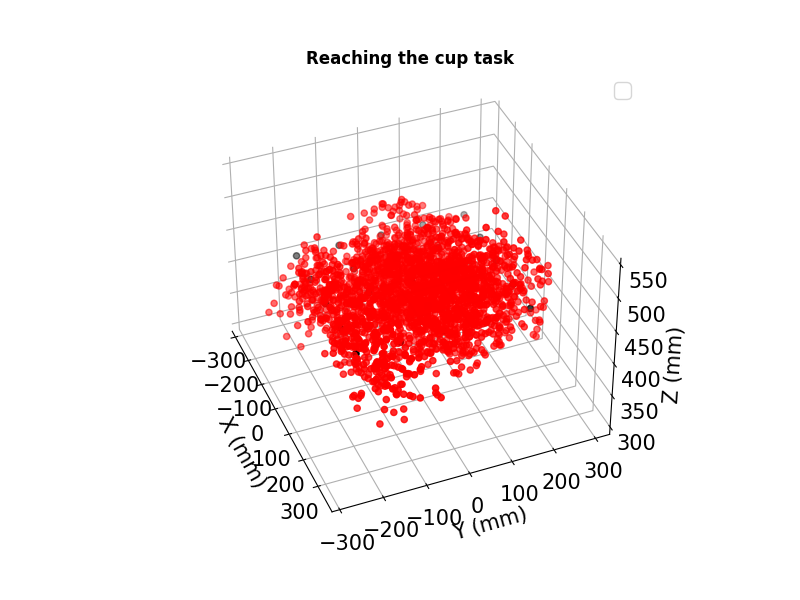

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(25, 5)
584


In [42]:
# fig = plt.figure(figsize = (8,6),dpi =100)
fig = plt.figure(figsize = (8,6),dpi = 100)

ax = fig.add_subplot(111, projection='3d')
plt.rcdefaults() 
plt.title('Reaching the cup task', weight='bold')
ax.set_facecolor("white")
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE =30

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
#     plt.rc('title', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

def plotE(E, color='k', label = None):
    ax.scatter3D(E[:, 0], E[:, 1], E[:, 2], color=color, label = label)
    plt.legend()
# plotE(E_ik_25, color='b')
# plotE(E_do, color='k')
# plotE(E_q_dmp, color='r')
# plotE(E_dmp, color='b')
# 


##
q_ik_25= []
E_ik_25= []
s =20
for i in range(81):
    if (i%s==0):
        for j in range(81):
            if (j%s==0):
    #             print(i,j)
                q_ik_25.append(q_gen_new[81*i+j])
                E_ik_25.append(E_gen_new[81*i+j])

q_ik_25 = np.array(q_ik_25)
E_ik_25 = np.array(E_ik_25)
print(q_ik_25.shape)
plotE(E_ik_25, color='k')
n = np.random.randint(0,len(E_dmps))
print(n)
# plotE(E_do, color='k', label='E_measures')
# plotE(E_dmps[n], color='b', label='E_DMPs_E')
# plotE(E_q_dmps[n], color='r', label='E_DMPs_q')
plotE(E_dmps[:,-1,:], color='r')

In [43]:
plt.savefig(f"plot_e/end_gen.svg")
plt.savefig(f"plot_e/end_gen.png")

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
df = pd.DataFrame()
df['sim_x']=cosine_similarity(E_dmps[:,:,0],E_q_dmps[:,:,0]).diagonal()
df['sim_y']=cosine_similarity(E_dmps[:,:,1],E_q_dmps[:,:,1]).diagonal()
df['sim_z']=cosine_similarity(E_dmps[:,:,2],E_q_dmps[:,:,2]).diagonal()
df['mae_x']=np.abs(E_dmps[:,-1,0]-E_q_dmps[:,-1,0])
df['mae_y']=np.abs(E_dmps[:,-1,1]-E_q_dmps[:,-1,1])
df['mae_z']=np.abs(E_dmps[:,-1,2]-E_q_dmps[:,-1,2])

df.describe().T.to_excel(f'gen_dmps.xlsx')
df.describe().T

In [65]:
# r = 13
# for r in range(25):
# plotE(E_dmps[r,:,:], color='r')
# plotE(E_q_dmps[r,:,:], color='b')

In [30]:
##
q_ik_25= []
E_ik_25= []
s =20
for i in range(81):
    if (i%s==0):
        for j in range(81):
            if (j%s==0):
    #             print(i,j)
                q_ik_25.append(q_gen_new[81*i+j])
                E_ik_25.append(E_gen_new[81*i+j])

q_ik_25 = np.array(q_ik_25)
E_ik_25 = np.array(E_ik_25)


In [31]:
# n = np.random.randint(0,len(E_dmps))
# print(n)
# plotE(E_do, color='k')
# plotE(E_dmps[n], color='b')
# plotE(E_q_dmps[n], color='r')

In [27]:
plotE(E_do, color='b')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### Load điểm cuối (goal)

In [34]:
# q_ik = np.loadtxt('data/diem_cuoi/q_441.txt',  delimiter=' ')
# E_ik = np.loadtxt('data/diem_cuoi/E_441.txt',  delimiter=' ')
# plotE(E_ik, color='k')

### Lấy 25 điểm

In [35]:
# ##
# q_ik_25= []
# E_ik_25= []

# for i in range(21):
#     for j in range(21):
#         if (i%5==0)&(j%5==0):
# #             print(i,j)
#             q_ik_25.append(q_ik[5*i+j])
#             E_ik_25.append(E_ik[5*i+j])
            
# q_ik_25 = np.array(q_ik_25)
# E_ik_25 = np.array(E_ik_25)
# print(q_ik_25.shape)
# plotE(E_ik_25, color='r')

In [2]:
#  q_dmps, E_dmps, E_q_dmps= dmp_gen(q_ik_25[12:13],q_do, robot, random_e=0.1, n=200)
q_dmps, E_dmps, E_q_dmps= dmp_gen(q_ik_25,q_do, robot, random_e=0.4, n=100)

## Lưu kết quả

In [121]:
np.save('data/train_v2/q_dmps_uong_3_gen_25.npy',q_dmps)
np.save('data/train_v2/E_dmps_uong_3_gen_25.npy',E_dmps)
np.save('data/train_v2/E_q_dmps_uong_3_gen_25.npy',E_q_dmps)